<a href="https://colab.research.google.com/github/WilliamClf/KMeans-DataSet-Eccomerce/blob/main/TrabKMeansIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Mall_Customers.csv')

# Visualizar os primeiros registros
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# Remover a coluna CustomerID, que não é relevante para a análise

df = df.drop('CustomerID', axis=1)

# Normalizar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

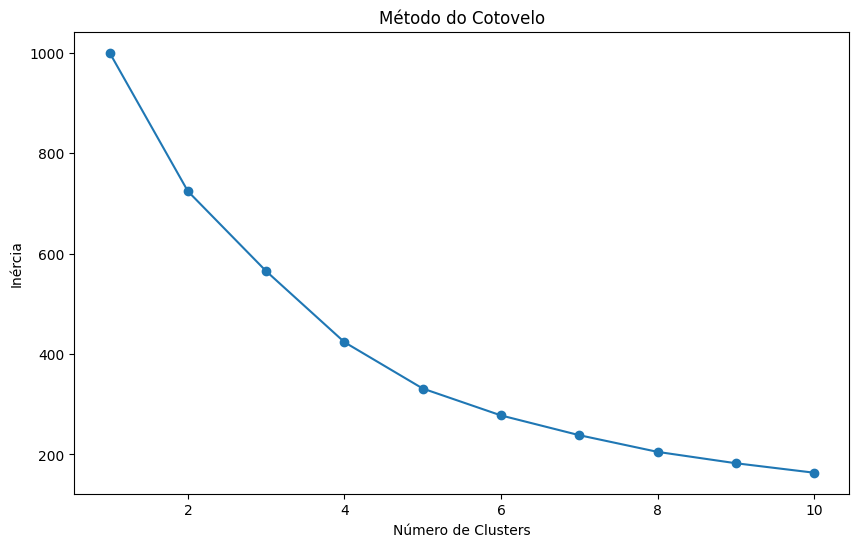

In [13]:
# Determinar o número ideal de clusters usando o método do cotovelo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


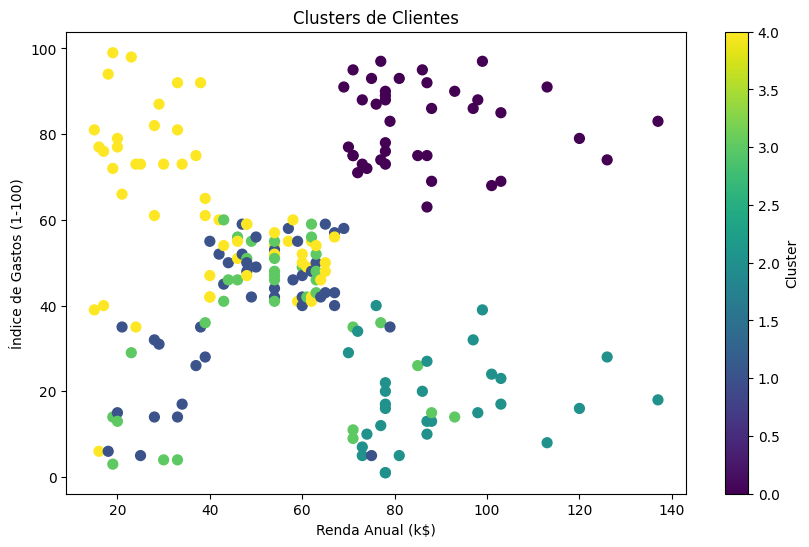

In [14]:
# Aplicar K-means com o número de clusters ideal (por exemplo, 5)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(df_scaled)
df['Cluster'] = clusters

# Visualizar os clusters em um gráfico 2D (renda anual x índice de gastos)
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Índice de Gastos (1-100)')
plt.title('Clusters de Clientes')
plt.colorbar(label='Cluster')
plt.show()

In [18]:
# Calcular a pontuação de silhueta para avaliar a qualidade dos clusters
score = silhouette_score(df_scaled, clusters)
print(f'Pontuação de Silhueta: {score:.2f}')

# Descrever as características dos clusters
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    print(f'\nCluster {i}:')
    print(f'Número de clientes: {len(cluster_data)}')
    print(f'Renda Anual Média: {cluster_data["Annual Income (k$)"].mean():.2f}')
    print(f'Índice de Gastos Médio: {cluster_data["Spending Score (1-100)"].mean():.2f}')
    print(f'Idade Média: {cluster_data["Age"].mean():.2f}')

Pontuação de Silhueta: 0.39

Cluster 0:
Número de clientes: 39
Renda Anual Média: 86.54
Índice de Gastos Médio: 82.13
Idade Média: 32.69

Cluster 1:
Número de clientes: 43
Renda Anual Média: 49.23
Índice de Gastos Médio: 40.07
Idade Média: 49.81

Cluster 2:
Número de clientes: 29
Renda Anual Média: 89.52
Índice de Gastos Médio: 18.00
Idade Média: 36.48

Cluster 3:
Número de clientes: 35
Renda Anual Média: 53.69
Índice de Gastos Médio: 36.77
Idade Média: 55.71

Cluster 4:
Número de clientes: 54
Renda Anual Média: 39.72
Índice de Gastos Médio: 61.20
Idade Média: 24.91
